In [8]:
from gekko import GEKKO
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
m = GEKKO(remote=False) # Initialize gekko

# Initialize variables
x1 = m.Var(value=0, lb=0, ub=5)

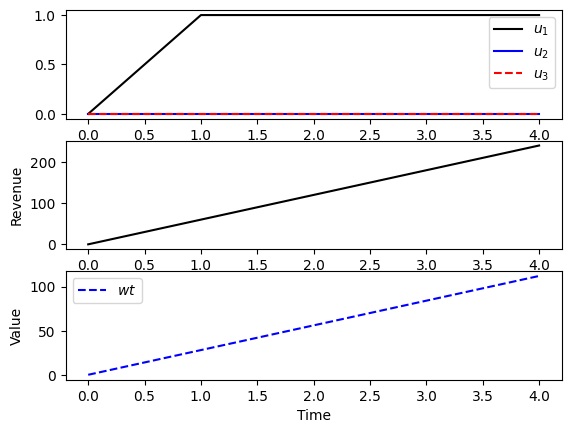

In [62]:
m = GEKKO()
nt = 5
#m.time = np.linspace(0,nt,2)
m.time = [i for i in range(0,nt)]

#variables
u1 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u2 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u3 = m.MV(value=0, lb=0, ub=1, integer=True) #input

# Variables
q = m.SV(value=0, lb=0, integer=True) #state variable
wt = m.SV(value=0, lb=0, ub=480, integer=True)
r = m.SV(value=0, lb=0, ub=480, integer=True)

## CONSTRAINTS
# STATUS = 0, optimizer doesn't adjust value;  STATUS = 1, optimizer can adjust
u1.STATUS = 1
u2.STATUS = 1
u3.STATUS = 1

# DMAX = maximum movement each cycle
#u1.DMAX = 1.0
#u2.DMAX = 1.0
#u3.DMAX = 1.0


# Equations
m.Equations([q.dt() == 12*u1 + 6*u2 + 1*u3,
            wt.dt() == 28*u1 + 57*u2 + 80*u3,
            wt <= 480,
            r.dt() == 12*5*u1 + 6*7*u2 + 1*10*u3,
            u1 + u2 + u3 <= 1
            ])



m.Maximize(r) # Objective function

m.options.IMODE = 6 # optimal control mode
#m.options.IMODE = 9 #dynamic optimization
m.solve(disp=False) # solve


plt.figure(1) # plot results
plt.subplot(3,1,1)
plt.plot(m.time,u1.value,'k-',label=r'$u_1$')
plt.plot(m.time,u2.value,'b-',label=r'$u_2$')
plt.plot(m.time,u3.value,'r--',label=r'$u_3$')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(m.time,r.value,'k-',label=r'$q$')
plt.ylabel('Revenue')

plt.subplot(3,1,3)
plt.plot(m.time,wt.value,'b--',label=r'$wt$')
plt.legend(loc='best')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [54]:
u3

[0.0, 0.99999997902, 0.41238899097, 2.0981694724e-08, 5.4908106941e-09, 3.2720526497e-10, 0.0, 8.076784554e-10, 4.1873629357e-09, 7.3750325436e-09, 8.7687421087e-09, 9.8290699154e-09, 1.0958145989e-08, 1.2208499941e-08, 1.356599525e-08, 1.5024588606e-08, 1.6625450222e-08, 1.8555333393e-08, 2.1495502572e-08, 2.8760531829e-08]

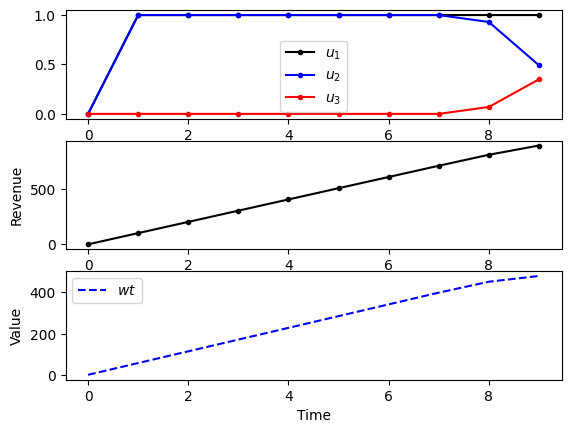

In [85]:
# Two product at a time
m = GEKKO()
nt = 10
#m.time = np.linspace(0,nt,2)
m.time = [i for i in range(0,nt)]

#variables
u1 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u2 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u3 = m.MV(value=0, lb=0, ub=1, integer=True) #input

# Variables
q = m.SV(value=0, lb=0, integer=True) #state variable
wt = m.SV(value=0, lb=0, ub=480, integer=True)
r = m.SV(value=0, lb=0, ub=5000, integer=True)

## CONSTRAINTS
# STATUS = 0, optimizer doesn't adjust value;  STATUS = 1, optimizer can adjust
u1.STATUS = 1
u2.STATUS = 1
u3.STATUS = 1

# DMAX = maximum movement each cycle
#u1.DMAX = 1.0
#u2.DMAX = 1.0
#u3.DMAX = 1.0

prices = {
    1: 5,
    2: 7,
    3: 10
}

quantities = {
    1: 12,
    2: 6,
    3: 1
}


# Equations
m.Equations([q.dt() == 12*u1 + 6*u2 + 1*u3,
            wt.dt() == m.max2(m.max2(28*u1,57*u2),80*u3),
            wt <= 480,
            r.dt() == 12*5*u1 + 6*7*u2 + 1*10*u3,
            u1 + u2 + u3 <= 2
            ])



m.Maximize(r) # Objective function

m.options.IMODE = 6 # optimal control mode
#m.options.IMODE = 9 #dynamic optimization
m.solve(disp=False) # solve


plt.figure(1) # plot results
plt.subplot(3,1,1)
plt.plot(m.time,u1.value,'k.-',label=r'$u_1$')
plt.plot(m.time,u2.value,'b.-',label=r'$u_2$')
plt.plot(m.time,u3.value,'r.-',label=r'$u_3$')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(m.time,r.value,'k.-',label=r'$q$')
plt.ylabel('Revenue')

plt.subplot(3,1,3)
plt.plot(m.time,wt.value,'b--',label=r'$wt$')
plt.legend(loc='best')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [86]:
wt

[0.0, 57.000000545, 114.00000109, 171.00000163, 228.00000217, 285.00000271, 342.00000324, 399.00000376, 451.99999971, 480.0]

In [87]:
print(u1.value)
print(u2.value)
print(u3.value)

[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
[0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.92982449065, 0.49122807539]
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.07017550899, 0.35000000296]


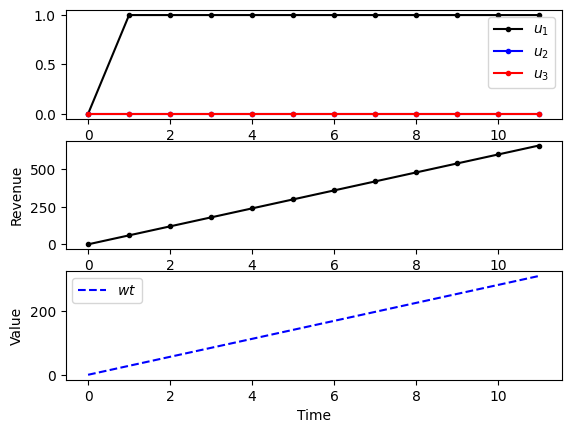

In [94]:
#Only one product at the time

m = GEKKO()
nt = 12
#m.time = np.linspace(0,nt,2)
m.time = [i for i in range(0,nt)]

#variables
u1 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u2 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u3 = m.MV(value=0, lb=0, ub=1, integer=True) #input

# Variables
q = m.SV(value=0, lb=0, integer=True) #state variable
wt = m.SV(value=0, lb=0, ub=480, integer=True)
r = m.SV(value=0, lb=0, ub=5000, integer=True)

## CONSTRAINTS
# STATUS = 0, optimizer doesn't adjust value;  STATUS = 1, optimizer can adjust
u1.STATUS = 1
u2.STATUS = 1
u3.STATUS = 1

# DMAX = maximum movement each cycle
#u1.DMAX = 1.0
#u2.DMAX = 1.0
#u3.DMAX = 1.0

prices = {
    1: 5,
    2: 7,
    3: 10
}

quantities = {
    1: 12,
    2: 6,
    3: 1
}


# Equations
m.Equations([q.dt() == 12*u1 + 6*u2 + 1*u3,
            wt.dt() == m.max2(m.max2(28*u1,57*u2),80*u3),
            wt <= 480,
            r.dt() == 12*5*u1 + 6*7*u2 + 1*10*u3,
            u1 + u2 + u3 == 1
            ])



m.Maximize(r) # Objective function

m.options.IMODE = 6 # optimal control mode
#m.options.IMODE = 9 #dynamic optimization
m.solve(disp=False) # solve


plt.figure(1) # plot results
plt.subplot(3,1,1)
plt.plot(m.time,u1.value,'k.-',label=r'$u_1$')
plt.plot(m.time,u2.value,'b.-',label=r'$u_2$')
plt.plot(m.time,u3.value,'r.-',label=r'$u_3$')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(m.time,r.value,'k.-',label=r'$q$')
plt.ylabel('Revenue')

plt.subplot(3,1,3)
plt.plot(m.time,wt.value,'b--',label=r'$wt$')
plt.legend(loc='best')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [92]:
wt

[0.0, 28.000000257, 56.000000514, 84.000000771, 112.00000103, 140.00000128, 168.00000154, 196.00000179, 224.00000204, 252.00000229, 280.00000254, 308.00000276]

# Demand

In [99]:
# Two product at a time
m = GEKKO()
nt = 8
#m.time = np.linspace(0,nt,2)
m.time = [i for i in range(0,nt)]

#variables
u1 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u2 = m.MV(value=0, lb=0, ub=1, integer=True) #input
u3 = m.MV(value=0, lb=0, ub=1, integer=True) #input

# Variables
q = m.SV(value=0, lb=0, integer=True) #state variable
wt = m.SV(value=0, lb=0, ub=480, integer=True)
r = m.SV(value=0, lb=0, ub=5000, integer=True)
d1 = m.SV(value=0, lb=0, ub=100, integer=True)
d2 = m.SV(value=0, lb=0, ub=30, integer=True)
d3 = m.SV(value=0, lb=0, ub=1000, integer=True)

## CONSTRAINTS
# STATUS = 0, optimizer doesn't adjust value;  STATUS = 1, optimizer can adjust
u1.STATUS = 1
u2.STATUS = 1
u3.STATUS = 1

# DMAX = maximum movement each cycle
#u1.DMAX = 1.0
#u2.DMAX = 1.0
#u3.DMAX = 1.0

prices = {
    1: 5,
    2: 7,
    3: 10
}

quantities = {
    1: 12,
    2: 6,
    3: 1
}


# Equations
m.Equations([q.dt() == 12*u1 + 6*u2 + 1*u3,
            wt.dt() == m.max2(m.max2(28*u1,57*u2),80*u3),
            wt <= 480,
            r.dt() == 12*5*u1 + 6*7*u2 + 1*10*u3,
            u1 + u2 + u3 <= 2,
            d1.dt() == u1*12,
            d2.dt() == u2*6,
            d3.dt() == u3*1,
            #d1 <= 100,
            #d2 <= 30
            ])



m.Maximize(r) # Objective function

m.options.IMODE = 6 # optimal control mode
#m.options.IMODE = 9 #dynamic optimization
m.solve(disp=False) # solve


plt.figure(1) # plot results
plt.subplot(3,1,1)
plt.plot(m.time,u1.value,'k.-',label=r'$u_1$')
plt.plot(m.time,u2.value,'b.-',label=r'$u_2$')
plt.plot(m.time,u3.value,'r.-',label=r'$u_3$')
plt.legend(loc='best')

plt.subplot(3,1,2)
plt.plot(m.time,r.value,'k.-',label=r'$q$')
plt.ylabel('Revenue')

plt.subplot(3,1,3)
plt.plot(m.time,wt.value,'b--',label=r'$wt$')
plt.legend(loc='best')

plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

apm 201.158.21.107_gk_model72 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 1.0.1
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            2
   Constants    :            0
   Variables    :           16
   Intermediates:            0
   Connections  :            6
   Equations    :           12
   Residuals    :           12
 
 Number of state variables:            266
 Number of total equations: -          231
 Number of slack variables: -           14
 ---------------------------------------
 Degrees of freedom       :             21
 
 **********************************************
 Dynamic Control with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program contains Ip

Exception:  @error: Solution Not Found


wt

In [6]:
# Moving Horizon Estimation
# Estimator Model
m = GEKKO()
#m.time = p.time

# Parameters
m.u1 = m.MV(value=0, lb=0, ub=1) #input
m.u2 = m.MV(value=0, lb=0, ub=1) #input
m.u3 = m.MV(value=0, lb=0, ub=1) #input

#m.K = m.FV(value=1, lb=1, ub=3)    # gain
#m.tau = m.FV(value=5, lb=1, ub=10) # time constant

# Variables
m.q = m.SV() #state variable
m.wt = m.CV(value=0) #measurement

# Equations
m.Equations([m.q.dt() == 12*m.u1 + 6*m.u2 + 1*m.u3,
            m.wt.dt() == 28*m.u1 + 57*m.u2 + 80*m.u3,
            ])
#m.Minimize()
# Options
m.options.IMODE = 5 #MHE
m.options.EV_TYPE = 1
# STATUS = 0, optimizer doesn't adjust value;  STATUS = 1, optimizer can adjust
m.u1.STATUS = 1
m.u2.STATUS = 1
m.u3.STATUS = 1

# FSTATUS = 0, no measurement;  FSTATUS = 1, measurement used to update model
#m.u.FSTATUS = 1
#m.q.FSTATUS = 1
#m.wt.FSTATUS = 1

# DMAX = maximum movement each cycle
m.u1.DMAX = 1.0
m.u2.DMAX = 1.0
m.u3.DMAX = 1.0

# MEAS_GAP = dead-band for measurement / model mismatch
#m.y.MEAS_GAP = 0.25

# solve
m.solve(disp=False)

# Plot results
plt.subplot(2,1,1)
plt.plot(m.time,u_meas,'b:',label='Input (u) meas')
plt.legend()
plt.subplot(2,1,2)
plt.plot(m.time,y_meas,'gx',label='Output (y) meas')
plt.plot(p.time,p.y.value,'k-',label='Output (y) actual')
plt.plot(m.time,m.y.value,'r--',label='Output (y) estimated')
plt.legend()
plt.show()

Exception:  @error: Insufficient Data
 CSV Read Error  : number of data rows must be >= 2 for dynamic problems
 Data Points Identified:           1
 STOPPING. . .


In [ ]:
# Estimator Model
m = GEKKO(remote=False) # Initialize gekko
m.time = p.time
#m.time = np.linspace(0,20,41)

# Parameters
mass = 500
b = m.Param(value=50)
K = m.Param(value=0.8)

# Manipulated variable
x = m.MV(value=0, lb=0, ub=1)
x.STATUS = 1  # allow optimizer to change
#p.DCOST = 0.1 # smooth out gas pedal movement
#p.DMAX = 20   # slow down change of gas pedal
x.DMAX = 1 

# Controlled Variable
v = m.CV(value=0)
v.STATUS = 1  # add the SP to the objective
m.options.CV_TYPE = 2 # squared error
v.SP = 40     # set point
v.TR_INIT = 1 # set point trajectory
v.TAU = 5     # time constant of trajectory

# Process model
m.Equation(mass*v.dt() == -v*b + K*b*p)

m.options.IMODE = 6 # control
m.solve(disp=False)

# get additional solution information
import json
with open(m.path+'//results.json') as f:
    results = json.load(f)

plt.figure()
plt.subplot(2,1,1)
plt.plot(m.time,p.value,'b-',label='MV Optimized')
plt.legend()
plt.ylabel('Input')
plt.subplot(2,1,2)
plt.plot(m.time,results['v1.tr'],'k-',label='Reference Trajectory')
plt.plot(m.time,v.value,'r--',label='CV Response')
plt.ylabel('Output')
plt.xlabel('Time')
plt.legend(loc='best')
plt.show()